### Aim of this notebook is to explain key features of the model and why we are making specific predictions

#### Import data and modules

In [25]:
import pandas as pd
from sklearn.inspection import PartialDependenceDisplay
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import lime
from lime import lime_tabular


In [26]:
df = pd.read_csv('../data/df_prepped.csv')
pd.set_option('display.max_columns', None)

print('df.shape:', df.shape)
df.head()

df.shape: (32330, 52)


Year Countries    lat    lon  Sand_1  Sand_2  Sand_3  Sand_4  Sand_5  \
0  2007    Angola  -8.75  14.75      50      51      51      48      45   
1  2007    Angola -16.25  14.25      62      64      63      59      58   
2  2007    Angola -17.25  14.25      69      71      70      67      65   
3  2007    Angola -11.75  14.75      60      63      61      57      53   
4  2007    Angola -14.25  13.75      67      69      68      63      61   

   Sand_6  Sand_7  Clay_1  Clay_2  Clay_3  Clay_4  Clay_5  Clay_6  Clay_7  \
0      46      46      37      35      36      39      42      42      42   
1      59      59      27      25      26      29      31      30      30   
2      65      66      19      16      18      21      24      24      23   
3      53      53      29      26      28      32      35      36      36   
4      61      61      22      19      21      25      28      28      29   

   OC_1  OC_2  OC_3  OC_4  OC_5  OC_6  OC_7  PAW_1  PAW_2  PAW_3  PAW_4  \
0  0.52  0.23  0.17  0.09  0.04  0.02  0.02   0.15   0.15   0.14   0.13   
1  0.11  0.05  0.07  0.04  0.02  0.02  0.01   0.11   0.10   0.10   0.09   
2  0.09  0.06  0.07  0.04  0.02  0.02  0.02   0.10   0.10   0.10   0.09   
3  0.46  0.16  0.14  0.08  0.05  0.04  0.03   0.12   0.13   0.12   0.12   
4  0.15  0.09  0.09  0.05  0.02  0.01  0.01   0.11   0.11   0.11   0.11   

   PAW_5  PAW_6  PAW_7  Y_maize_major        Farm  Sow_Maize_month_int  \
0   0.10   0.07   0.07       0.615357  104_Angola                    9   
1   0.07   0.07   0.03       0.257656   99_Angola                    9   
2   0.07   0.07   0.07       4.286831  108_Angola                    9   
3   0.11   0.10   0.09       0.700384  102_Angola                    9   
4   0.08   0.04   0.04       0.553450   43_Angola                    9   

   Harvest_Maize_month_int  sow_to_harvest_months  maize_lag-1  \
0                        4                      7     0.554392   
1                        4                      7     0.117051   
2                        4                      7     3.093239   
3                        4                      7     0.677797   
4                        4                      7     0.412071   

   pcp_mean_lag-1  tmax_mean_lag-1  tmin_mean_lag-1  spi_mean_lag-1  \
0       97.103755       301.939623       292.214020        0.093447   
1       59.292237       301.882929       288.092753        0.182926   
2       58.196545       302.891420       289.377311        0.991663   
3      149.210195       298.973795       287.311403        0.206751   
4       74.556629       304.006860       290.606725       -0.075621   

   maize_lag-2  pcp_mean_lag-2  tmax_mean_lag-2  tmin_mean_lag-2  \
0     0.721607      129.051864       301.518536       292.496579   
1     0.300217       47.697564       303.988747       288.916992   
2     4.044452       42.130629       305.494178       290.535403   
3     0.907431      159.454723       299.404975       287.724299   
4     0.675967       66.698670       304.644632       290.635254   

   spi_mean_lag-2  maize_lag-3  pcp_mean_lag-3  tmax_mean_lag-3  \
0        1.644698     0.620005      109.983325       301.786056   
1        0.909295     0.212699       41.130026       303.298082   
2        0.952237     2.295351       35.049776       304.824778   
3        1.374616     0.783018      174.088260       298.908208   
4        1.144088     0.605584       67.404588       303.930955   

   tmin_mean_lag-3  spi_mean_lag-3  
0       292.204097        0.514275  
1       288.642853        0.588172  
2       290.284886        0.371446  
3       287.362407        0.643207  
4       290.564185        0.553079

### Prepare datasets of **y** (target) and **X** (features)

In [27]:
df.columns

Index(['Year', 'Countries', 'lat', 'lon', 'Sand_1', 'Sand_2', 'Sand_3',
       'Sand_4', 'Sand_5', 'Sand_6', 'Sand_7', 'Clay_1', 'Clay_2', 'Clay_3',
       'Clay_4', 'Clay_5', 'Clay_6', 'Clay_7', 'OC_1', 'OC_2', 'OC_3', 'OC_4',
       'OC_5', 'OC_6', 'OC_7', 'PAW_1', 'PAW_2', 'PAW_3', 'PAW_4', 'PAW_5',
       'PAW_6', 'PAW_7', 'Y_maize_major', 'Farm', 'Sow_Maize_month_int',
       'Harvest_Maize_month_int', 'sow_to_harvest_months', 'maize_lag-1',
       'pcp_mean_lag-1', 'tmax_mean_lag-1', 'tmin_mean_lag-1',
       'spi_mean_lag-1', 'maize_lag-2', 'pcp_mean_lag-2', 'tmax_mean_lag-2',
       'tmin_mean_lag-2', 'spi_mean_lag-2', 'maize_lag-3', 'pcp_mean_lag-3',
       'tmax_mean_lag-3', 'tmin_mean_lag-3', 'spi_mean_lag-3'],
      dtype='object')

In [28]:
print('The datas set has years: ', list(df.Year.unique()))

The datas set has years:  [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]


In [29]:
df_label = df.loc[:,['Farm','Year']]

X = df.drop(columns=['Y_maize_major','Year','Countries','Farm'], axis=1)
y = df['Y_maize_major']

In [30]:
df_label.head(5)

Farm  Year
0  104_Angola  2007
1   99_Angola  2007
2  108_Angola  2007
3  102_Angola  2007
4   43_Angola  2007

### Intepretation methods

- We are exploring features without making forecast, therefore there is no need to split into train/test

#### 1. Information value features

In [31]:
### Fit Random forest and plot information value   
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)

rf.fit(X, y)


RandomForestRegressor(random_state=42)

In [32]:
# Create a dataframe with the feature importance scores from the random forest
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})

# Sort the features by IV in descending order
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

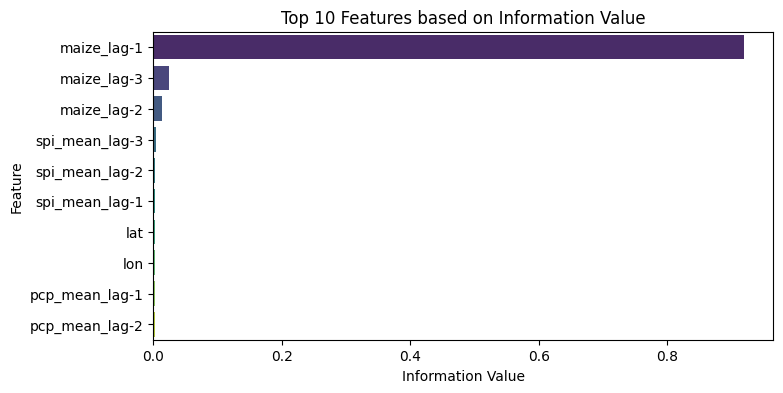

In [33]:
# Assuming you want to plot the top 10 features
top_features = feature_importance.head(10)

#Remove future warning


# Plot the features
plt.figure(figsize=(8, 4))
sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')
plt.title('Top 10 Features based on Information Value')
plt.xlabel('Information Value')
plt.ylabel('Feature')

## Save plot to folder plots
plt.savefig('../plots/Random_Forest_features_importance.png', dpi=300, bbox_inches='tight')

plt.show()

#### 2. Partial Dependence plots

In [34]:
features = ['maize_lag-1', 'maize_lag-2', 'pcp_mean_lag-1',"spi_mean_lag-1", 'Sow_Maize_month_int', 'lat','lon']

y= df['Y_maize_major']

X = df[features]
X = X.apply(pd.to_numeric, errors='coerce')

gbr_model = GradientBoostingRegressor(random_state=2021).fit(X, y)


#### Y-maize major - lagged by one and two years

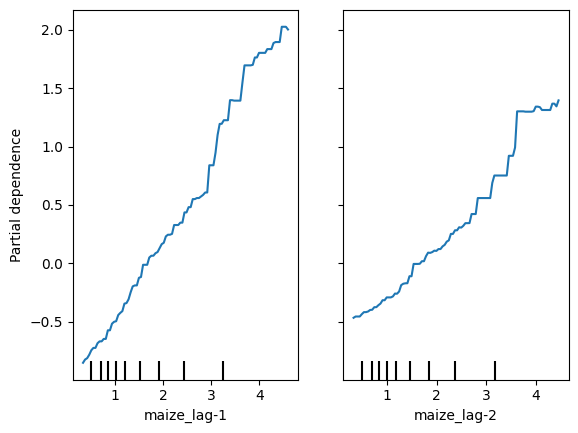

In [35]:

fig, ax = plt.subplots()
tree_disp = PartialDependenceDisplay.from_estimator(gbr_model, X, features=['maize_lag-1', 'maize_lag-2'], ax=ax)


fig.savefig('../plots/PDP_Maize_lagged_separately.png', dpi=300, bbox_inches='tight')

plt.show()

- Lag-1 has  higher impact, but both lag1 nad lag2 are very important

#### Longiture and Latitude separately

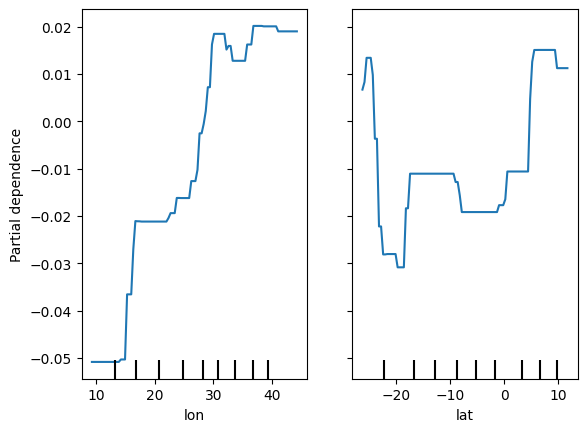

In [36]:

fig, ax = plt.subplots()
tree_disp = PartialDependenceDisplay.from_estimator(gbr_model, X, features=['lon', 'lat'], ax=ax)


fig.savefig('../plots/PDP_lon_lan_separately.png', dpi=300, bbox_inches='tight')


The highest production based on Lon is on the East. Based on Latitude we expect higher yield on the very south or very north (compared to equator regions)

##### Combination of Maize-lag_1 and Maize-lag_2

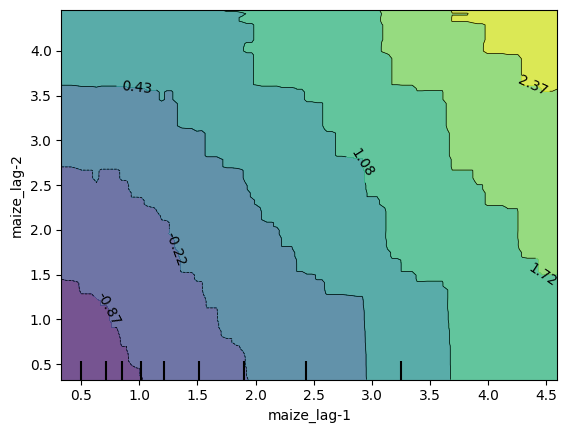

In [37]:
fig, ax = plt.subplots()
tree_disp = PartialDependenceDisplay.from_estimator(gbr_model, X, features=[['maize_lag-1', 'maize_lag-2']], ax=ax)

fig.savefig('../plots/PDP_Maize_lagged_combined.png', dpi=300, bbox_inches='tight')

plt.show()


##### Combination of Sow Month and Lattitude
 -  Sow month 12 indicates lower Yield, regardless of Lattitude. The highest Yield is when Sow months is 10-October in Southern tip of Africa

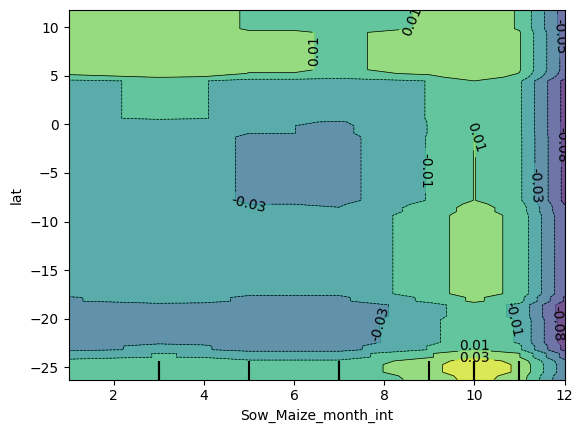

In [38]:
fig, ax = plt.subplots()
tree_disp = PartialDependenceDisplay.from_estimator(gbr_model, X, features=[['Sow_Maize_month_int', 'lat']], ax=ax)

fig.savefig('../plots/Sow_month_lattitude_combined.png', dpi=300, bbox_inches='tight')

plt.show()

#### Combination of maize_lag-1 and precipitation_lag-1

 - When adding percipitation, we can see a small effect in left part of X axis, however the impact of maize-lag-1 is much bigger

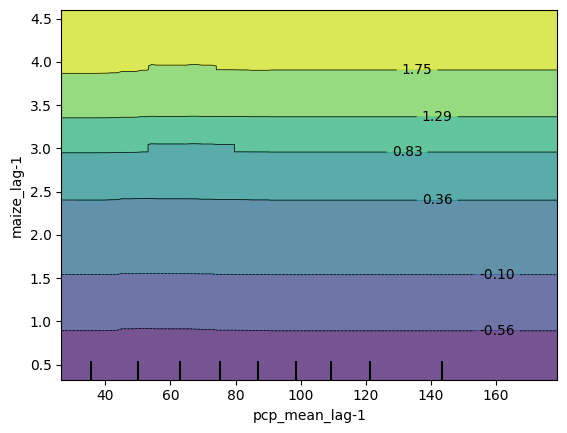

In [39]:
fig, ax = plt.subplots()
tree_disp = PartialDependenceDisplay.from_estimator(gbr_model,X,[['pcp_mean_lag-1', 'maize_lag-1']], ax=ax)


fig.savefig('../plots/PDP_combined_maize_lagged_precipitation.png', dpi=300, bbox_inches='tight')

plt.show()

##### Combination of SPI index and Sow month


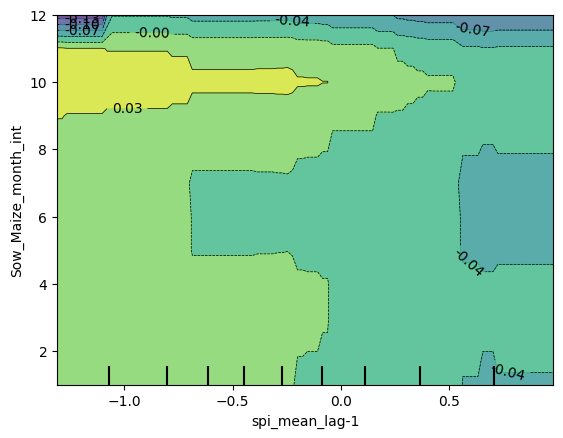

In [40]:

fig, ax = plt.subplots()
tree_disp = PartialDependenceDisplay.from_estimator(gbr_model, X, features=[["spi_mean_lag-1", 'Sow_Maize_month_int']], ax=ax)

fig.savefig('../plots/PDP_combined_spi_sow_months.png', dpi=300, bbox_inches='tight')

plt.show()

### 3. LIME (local intepretation)

##### Fit the explainer

In [41]:
# Train a machine learning model (Random Forest Regressor in this case)
rf_model = RandomForestRegressor(n_estimators=50, random_state=42)
rf_model.fit(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test, label_train, label_test = train_test_split(X, y,df_label, test_size=0.2, shuffle=False)

# Train the LIME explainer on the training set
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns, training_labels=y_train, mode='regression')



#### Select specific instances to explain

##### 1st Instance - Tanzania

In [42]:
instance_index =1000  # Replace with the index of the instance you want to explain
print(label_test[['Farm','Year']].iloc[instance_index])

Farm    3304_United Republic of Tanzania
Year                                2014
Name: 26864, dtype: object


In [43]:
# Choose a specific instance from the test set for explanation
instance = X_test.iloc[[instance_index]]
true_label = y_test.iloc[instance_index]

# Generate an explanation for the instance
explanation = explainer.explain_instance(instance.values[0], rf_model.predict)

# Print the true label and the predicted value
print(label_test[['Farm','Year']].iloc[instance_index])
print(f"True Label: {true_label}")
print(f"Predicted Value: {rf_model.predict(instance.values)[0]}")

# Display the LIME explanation
explanation.show_in_notebook(show_all=False)

Farm    3304_United Republic of Tanzania
Year                                2014
Name: 26864, dtype: object
True Label: 2.32226491
Predicted Value: 2.2509955121800003


##### 2nd Instance - South Africa

In [44]:
instance_index =2900
print(label_test[['Farm','Year']].iloc[instance_index])


Farm    2855_South Africa
Year                 2015
Name: 28764, dtype: object


In [45]:
instance = X_test.iloc[[instance_index]]
true_label = y_test.iloc[instance_index]

# Generate an explanation for the instance
explanation = explainer.explain_instance(instance.values[0], rf_model.predict)

# Print the true label and the predicted value
print(label_test[['Farm','Year']].iloc[instance_index])
print(f"True Label: {true_label}")
print(f"Predicted Value: {rf_model.predict(instance.values)[0]}")

# Display the LIME explanation
explanation.show_in_notebook(show_all=False)

Farm    2855_South Africa
Year                 2015
Name: 28764, dtype: object
True Label: 5.464684486
Predicted Value: 6.774980783220002


##### 3rd Instance - Egypt

In [46]:
instance_index =2080

In [47]:
instance = X_test.iloc[[instance_index]]
true_label = y_test.iloc[instance_index]

# Generate an explanation for the instance
explanation = explainer.explain_instance(instance.values[0], rf_model.predict)

# Print the true label and the predicted value
print(label_test[['Farm','Year']].iloc[instance_index])
print(f"True Label: {true_label}")
print(f"Predicted Value: {rf_model.predict(instance.values)[0]}")

# Display the LIME explanation
explanation.show_in_notebook(show_all=False)

Farm    1461_Egypt
Year          2015
Name: 27944, dtype: object
True Label: 1.476622343
Predicted Value: 1.6042236923800006
